<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/Linear_Model_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Upload dataset jika menggunakan Google Colab
from google.colab import files

uploaded = files.upload()


Saving Automobile.csv to Automobile.csv


In [3]:
!pip install mglearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.1 MB/s eta 0:00:00


In [4]:

# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import mglearn

# Mengatur gaya seaborn
sns.set(style="whitegrid")


In [5]:

# Membaca dataset
df = pd.read_csv("Automobile.csv")

# Menampilkan 5 baris pertama dataset
df.head()


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


In [6]:

# Cek informasi dataset
df.info()

# Menghapus baris dengan nilai yang hilang
df = df.dropna()

# Menampilkan deskripsi statistik
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,11445.729560,32.081761,26.522013,5113.836478,95.836478,10.161132,3.236352,3.300126,119.226415,4.238994,2461.138365,53.899371,65.607547,172.413836,98.264151,3.194969,121.132075,0.735849
std,5877.856195,6.459189,6.097142,465.754864,30.718583,3.889475,0.294888,0.267336,30.460791,0.669962,481.941321,2.268761,1.947883,11.523177,5.167416,0.983908,35.651285,1.193086
min,5118.000000,18.000000,15.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,3.000000,1488.000000,49.400000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7372.000000,28.000000,23.000000,4800.000000,69.000000,8.700000,3.105000,3.050000,97.000000,4.000000,2065.500000,52.250000,64.000000,165.650000,94.500000,2.000000,94.000000,0.000000
50%,9233.000000,32.000000,26.000000,5200.000000,88.000000,9.000000,3.270000,3.270000,110.000000,4.000000,2340.000000,54.100000,65.400000,172.400000,96.900000,4.000000,113.000000,1.000000
75%,14719.500000,37.000000,31.000000,5500.000000,114.000000,9.400000,3.410000,3.560000,135.000000,4.000000,2809.500000,55.500000,66.500000,177.800000,100.800000,4.000000,148.000000,2.000000
max,35056.000000,54.000000,49.000000,6600.000000,200.000000,23.000000,4.170000,3.940000,258.000000,8.000000,4066.000000,59.800000,71.700000,202.600000,115.600000,4.000000,256.000000,3.000000


In [7]:

# Memilih fitur numerik untuk prediksi
features = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']
target = 'symboling'

# Memisahkan fitur dan target
X = df[features]
y = df[target]

# Membagi data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:

# Membuat model Linear Regression
model = LinearRegression()

# Melatih model
model.fit(X_train_scaled, y_train)

# Memprediksi nilai pada data uji
y_pred = model.predict(X_test_scaled)

# Menampilkan koefisien regresi
coef_df = pd.DataFrame(model.coef_, index=features, columns=["Coefficient"])
coef_df


,Coefficient
wheel-base,-0.988705
length,-0.039834
width,0.513191
height,-0.187360
curb-weight,0.094120
engine-size,0.011341
horsepower,0.064621
city-mpg,-0.829936
highway-mpg,0.799933


In [9]:

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.8842
Root Mean Squared Error (RMSE): 0.9403
R-squared (R²): 0.3976


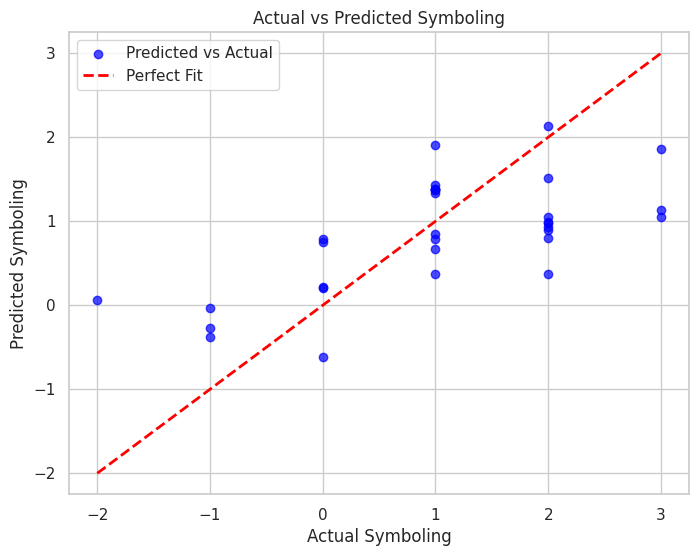

In [10]:

# Plot hasil prediksi vs aktual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Symboling")
plt.ylabel("Predicted Symboling")
plt.title("Actual vs Predicted Symboling")
plt.legend()
plt.show()



## Penjelasan Model Linear Regression

Model yang digunakan dalam analisis ini adalah **Linear Regression**, yang memiliki persamaan dasar:

\[ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n \]

Dimana:
- \( y \) adalah target variable (symboling),
- \( x_1, x_2, ..., x_n \) adalah fitur input seperti wheel-base, length, engine-size, dll.,
- \( \beta_0 \) adalah intercept (titik potong dengan sumbu y),
- \( \beta_1, \beta_2, ..., \beta_n \) adalah koefisien regresi untuk masing-masing fitur.

### Interpretasi Evaluasi Model
- **MSE (Mean Squared Error):** Mengukur rata-rata kesalahan kuadrat antara nilai aktual dan prediksi.
- **RMSE (Root Mean Squared Error):** Akar kuadrat dari MSE, mengukur kesalahan dalam satuan yang sama dengan target.
- **R² (R-squared):** Mengukur seberapa baik model menjelaskan variabilitas dalam data (nilai antara 0 dan 1, semakin tinggi semakin baik).
